In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from random import randint

# Describing a Categorical Variable

Categorical data use labels, names, or other desciptors to identify exclusive categories or types of things
- Region (North, South, East, West)
- Machine (M1, M2, M3)
- Car Make (Ford, Toyota, Honda)

Quantitative Data are numerical values that represent frequency, measurement, etc.
- Sales for each region in millions (1.2, 3.5, 10.4, 6.9)
- Production units (983, 1085, 899)
- Fastest car mph (216, 156, 169)

## Frequency Distribution
### Survey of 100 SmartPhone Users in the United State

In [3]:
phone_list = {'SMARTPHONE BRAND': ['Apple', 'HTC', 'LG','Motorola','Samsung','Other'], 'FREQUENCY': [45,2,10,4,28,11]}
df1 = pd.DataFrame(data = phone_list)
df1 = df1[['SMARTPHONE BRAND', 'FREQUENCY']]
#df1.set_index('SMARTPHONE BRAND')
df1

,SMARTPHONE BRAND,FREQUENCY
0,Apple,45
1,HTC,2
2,LG,10
3,Motorola,4
4,Samsung,28
5,Other,11


In [4]:
df2 = pd.DataFrame({'SMARTPHONE BRAND': ['Total'], 'FREQUENCY': [df1['FREQUENCY'].sum()]})
df1.append(df2, ignore_index=True)

,FREQUENCY,SMARTPHONE BRAND
0,45,Apple
1,2,HTC
2,10,LG
3,4,Motorola
4,28,Samsung
5,11,Other
6,100,Total


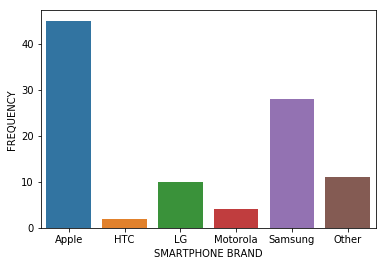

In [5]:
ax = sns.barplot(x="SMARTPHONE BRAND", y="FREQUENCY", data=df1)

## Relative Frequency
Relative Frequency of a class = $ \frac{Frequency of the class}{n} $

Relative Frequency "Samsung" = $ \frac{28}{100} = 0.28 $

In [6]:
## Frequency Distribution
df1['RELATIVE FREQUENCY'] = df1['FREQUENCY'].apply(lambda x: x/100)
df1 = df1[['SMARTPHONE BRAND', 'FREQUENCY', 'RELATIVE FREQUENCY']]
df1

,SMARTPHONE BRAND,FREQUENCY,RELATIVE FREQUENCY
0,Apple,45,0.45
1,HTC,2,0.02
2,LG,10,0.10
3,Motorola,4,0.04
4,Samsung,28,0.28
5,Other,11,0.11


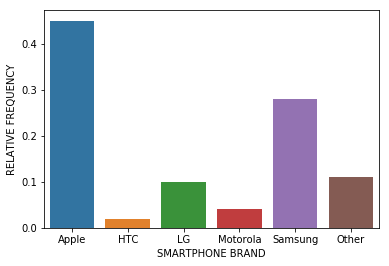

In [7]:
ax = sns.barplot(x="SMARTPHONE BRAND", y="RELATIVE FREQUENCY", data=df1)

# Descriptive Statistics, Histograms
### Survey of 100 SmartPhone Users in the United States - AGE

Histograms divide the entire range of values into a series of intervals. 

Ex Age "bin" 18+ of 100 people seperates into three different bins
- 18-39 has 39 people
- 40-59 has 45 people
- 60+ has 16 people

- Too few bins can create a histogram that doesn't show the shape distribution of the underlying data
- Too many bins create a histogram where there are too few observations in each bin and the overall general shape distribution is too broken up

- Arguably the most useful preliminary visualization for quantitative data
- Shows the shape of the distribution of values
- Horizontal (x-axis) is the variable of interest (AGE)
- Vertical (y-axis) can summarize the frequency, relative frequency, or percent frequency
- Vertical rectangle for each class or bin
- Height is determined by frequency, relative frequency, or percent frequency
- No space or gaps between bars of a histogram

In [8]:
ages_of_hundred = pd.Series({'Ages': np.random.randint(18, 99, 100)})
print(ages_of_hundred.Ages)
ages_of_hundred['Ages'].size
first_bin = ages_of_hundred.Ages[(ages_of_hundred.Ages > 17) & (ages_of_hundred.Ages < 40)].size
second_bin = ages_of_hundred.Ages[(ages_of_hundred.Ages > 39) & (ages_of_hundred.Ages < 60)].size
third_bin = ages_of_hundred.Ages[ages_of_hundred.Ages > 59].size

[62 91 91 40 97 38 32 57 86 40 91 26 94 93 42 92 80 73 71 66 87 24 29 76
 20 26 55 52 93 88 90 63 32 47 44 88 97 69 46 22 61 82 37 39 92 70 79 57
 80 28 32 98 23 31 90 18 76 34 86 95 96 78 20 25 82 71 47 93 78 67 71 61
 83 90 30 70 75 48 27 95 54 35 70 24 70 49 46 50 29 61 23 45 46 69 70 90
 73 63 21 42]


In [55]:
cat = ['18-39','40-59','60+']
df_ages = pd.DataFrame({'Ages': [cat[0], cat[1], cat[2]], 'Frequency': [first_bin, second_bin, third_bin]})
df_ages

,Ages,Frequency
0,18-39,26
1,40-59,19
2,60+,55


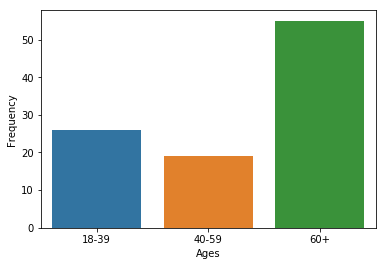

In [56]:
ax = sns.barplot(x="Ages", y="Frequency", data=df_ages)

In [57]:
def ages_cat(col):
    if (col>17) & (col<40):
        return '18-39'
    elif (col>39) & (col<60):
        return '40-59'
    elif col>59:
        return '60+'
    
ages_of_hundred = pd.DataFrame({'Frequency': np.random.randint(18, 99, 100)})
ages_of_hundred['Age_Category'] = ages_of_hundred['Frequency'].apply(ages_cat)
ages_df = ages_of_hundred['Frequency'].groupby(ages_of_hundred['Age_Category']).count()
ages_df = ages_df.to_frame().reset_index()
ages_df

,Age_Category,Frequency
0,18-39,29
1,40-59,21
2,60+,50


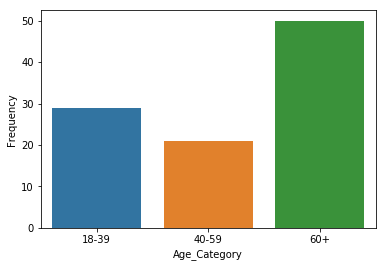

In [58]:
ax = sns.barplot(x="Age_Category", y="Frequency", data=ages_df)

# Stem and Leaf Diagrams

- A stem and leaf display shows 
- - The rank order of the data
- - The shape of the distribution of data
- - Modal qualities of the data (frequent observations)
- It's called a stem and leaf because that is what it looks like; a stem with leaves off the side
- It takes the form of STEM | LEAF
- The leaf is always the last single digit
- The stem is formed from all digits left of the last digit


In [6]:
stem_array = np.array([50,61,66,73,82,82,90,103,108,115])

\begin{matrix}
  Stem & | & Leaves\\
  5 & | & 0\\
  6 & | & 1 & 6\\
  7 & | & 3\\
  8 & | & 2 & 2\\
  9 & | & 0\\
  10 & | & 3 & 8\\
  11 & | & 5\\
\end{matrix}

# Descriptive Statistics Cross Tabulation

- Crosstabulation is a table summary for two variables
- Shows relationship between two variables
- The size of the cross tabulation is the number of categories of one variable multiplied by the number of categories of the second variable
- If the first category has 5 categories and the second variable has 6 categories then the crosstabulation if 5 * 6 = 30 cells
- Each cell is an intersection of the two categories at that point
- Can be done using pivot tables

Example:

4 Regions
- North, South, East, West
5 product Segments
- Smartphones, Televisions, Gaming, Appliances, Computers
100 observations of sales for each region X segment combination

In [210]:
sales = pd.read_csv('sales.csv', sep = ',')
print(sales,sales.dtypes)
type(sales)

   Region      Product  Price
0    East   Appliances   1704
1   North   Appliances   1656
2   South   Appliances   1342
3    West   Appliances   1243
4    East    Computers   1586
5   North    Computers   1583
6   South    Computers   1152
7    West    Computers   1382
8    East       Gaming   1681
9   North       Gaming   1859
10  South       Gaming   1367
11   West       Gaming   1605
12   East  Smartphones   1341
13  North  Smartphones   1336
14  South  Smartphones   1252
15   West  Smartphones   1785
16   East  Televisions   1415
17  North  Televisions   1128
18  South  Televisions   1709
19   West  Televisions   1572 Region     object
Product    object
Price       int64
dtype: object


pandas.core.frame.DataFrame

In [179]:
sales_by_region = pd.pivot_table(sales, values='Price', index=['Region'], columns=['Product'], aggfunc=np.sum)
sales_by_region

Product,Appliances,Computers,Gaming,Smartphones,Televisions
Region,,,,,
East,1704,1586,1681,1341,1415
North,1656,1583,1859,1336,1128
South,1342,1152,1367,1252,1709
West,1243,1382,1605,1785,1572


In [180]:
sales_by_region['Total'] = sales_by_region.apply(np.sum, axis=1)
sales_by_region.reset_index()

Product,Region,Appliances,Computers,Gaming,Smartphones,Televisions,Total
0,East,1704,1586,1681,1341,1415,7727
1,North,1656,1583,1859,1336,1128,7562
2,South,1342,1152,1367,1252,1709,6822
3,West,1243,1382,1605,1785,1572,7587


In [186]:
total = sales_by_region.apply(np.sum, axis=0)
total.values
total.keys()
values = total.values #np.insert(total.values, 0, 0)
keys = total.keys()
total_df = pd.DataFrame(values, index=keys).T
sales_by_region1 = sales_by_region.append(total_df)
sales_by_region1.rename(index={0: 'Total'})

Product,Appliances,Computers,Gaming,Smartphones,Televisions,Total
East,1704,1586,1681,1341,1415,7727
North,1656,1583,1859,1336,1128,7562
South,1342,1152,1367,1252,1709,6822
West,1243,1382,1605,1785,1572,7587
Total,5945,5703,6512,5714,5824,29698


In [192]:
sales_by_region1 = pd.pivot_table(sales, values='Price', index=['Region'], columns=['Product'], aggfunc=np.sum)
sales_by_region1['Total'] = sales_by_region.apply(np.sum, axis=1)
sales_by_region1.loc['Total'] = sales_by_region.apply(np.sum, axis=0)
sales_by_region1

Product,Appliances,Computers,Gaming,Smartphones,Televisions,Total
Region,,,,,,
East,1704,1586,1681,1341,1415,15454
North,1656,1583,1859,1336,1128,15124
South,1342,1152,1367,1252,1709,13644
West,1243,1382,1605,1785,1572,15174
Total,5945,5703,6512,5714,5824,29698
